In [28]:
import pandas as pd
import numpy as np
df = pd.read_csv('rawraw.csv' , delimiter= ',')
df.columns
df['spread'] = df['SMF (TL/MWh)'] - df['PTF (TL/MWh)Okuma Yukumlulu']    
df['target_load'] = df['YAL (0) Kodlu (MWh)'] + df['YAL (1) Kodlu (MWh)'] + df['YAL (2) Kodlu (MWh)'] - df['YAL Teslim Edilmeyen (MWh)'] - df['YAT (0) Kodlu (MWh)'] - df['YAT (1) Kodlu (MWh)'] - df['YAT (2) Kodlu (MWh)'] + df['YAT Teslim Edilmeyen (MWh)']
print(df.columns)
df = df.fillna(0)
print(len(df))
df['Date'] = pd.date_range(start = '20180201' , freq = 'H' , periods = len(df))
df = df[['Date' , 'target_load']]
df.set_index('Date' , inplace = True)
df = df.asfreq('h')
len(df)


Index(['Saat', 'Yuk Tahmin Plani (MWh)', 'Ikili Anlasma (MWh)',
       'PTF (TL/MWh)Okuma Yukumlulu', 'SAM (MWh)', 'SSM(MWh)', 'KGUP (MWh)',
       'SMF (TL/MWh)', 'YAL (0) Kodlu (MWh)', 'YAL (1) Kodlu (MWh)',
       'YAL (2) Kodlu (MWh)', 'YAL Teslim Edilmeyen (MWh)',
       'YAT (0) Kodlu (MWh)', 'YAT (1) Kodlu (MWh)', 'YAT (2) Kodlu (MWh)',
       'YAT Teslim Edilmeyen (MWh)', 'spread', 'target_load'],
      dtype='object')
26328


26328

In [29]:
df['sign'] = np.sign(df['target_load'])
df

,target_load,sign
Date,,
2018-02-01 00:00:00,49.25,1.0
2018-02-01 01:00:00,658.52,1.0
2018-02-01 02:00:00,0.00,0.0
2018-02-01 03:00:00,-788.52,-1.0
2018-02-01 04:00:00,-497.19,-1.0
...,...,...
2021-02-01 19:00:00,42.33,1.0
2021-02-01 20:00:00,71.76,1.0
2021-02-01 21:00:00,0.00,0.0


In [30]:
df.sign = df.sign.mask(df.sign < 0, 0)
df.head()

,target_load,sign
Date,,
2018-02-01 00:00:00,49.25,1.0
2018-02-01 01:00:00,658.52,1.0
2018-02-01 02:00:00,0.00,0.0
2018-02-01 03:00:00,-788.52,0.0
2018-02-01 04:00:00,-497.19,0.0


In [14]:
df = df[['sign']]

<AxesSubplot:xlabel='Date'>

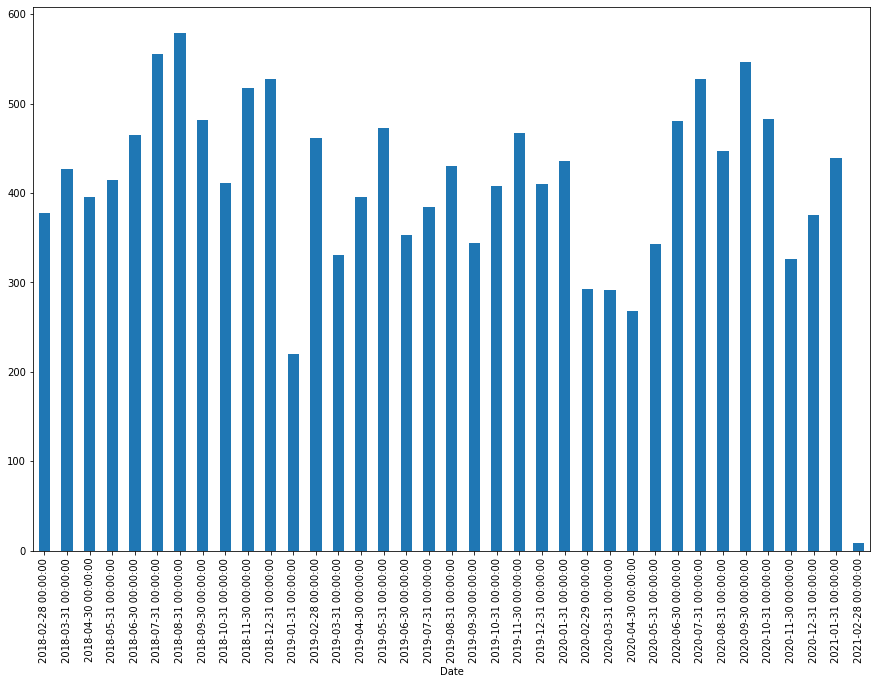

In [31]:
df['sign'].resample(rule = 'M').sum().plot.bar(figsize = (15,10))

In [32]:
monthly_upCounts = df['sign'].resample(rule = 'M').sum()
monthly_upCounts

Date
2018-02-28    378.0
2018-03-31    427.0
2018-04-30    395.0
2018-05-31    415.0
2018-06-30    465.0
2018-07-31    555.0
2018-08-31    579.0
2018-09-30    482.0
2018-10-31    411.0
2018-11-30    518.0
2018-12-31    527.0
2019-01-31    220.0
2019-02-28    461.0
2019-03-31    331.0
2019-04-30    396.0
2019-05-31    473.0
2019-06-30    353.0
2019-07-31    384.0
2019-08-31    430.0
2019-09-30    344.0
2019-10-31    408.0
2019-11-30    467.0
2019-12-31    410.0
2020-01-31    436.0
2020-02-29    293.0
2020-03-31    292.0
2020-04-30    268.0
2020-05-31    343.0
2020-06-30    481.0
2020-07-31    528.0
2020-08-31    447.0
2020-09-30    547.0
2020-10-31    483.0
2020-11-30    326.0
2020-12-31    375.0
2021-01-31    439.0
2021-02-28      9.0
Freq: M, Name: sign, dtype: float64

<AxesSubplot:xlabel='Date'>

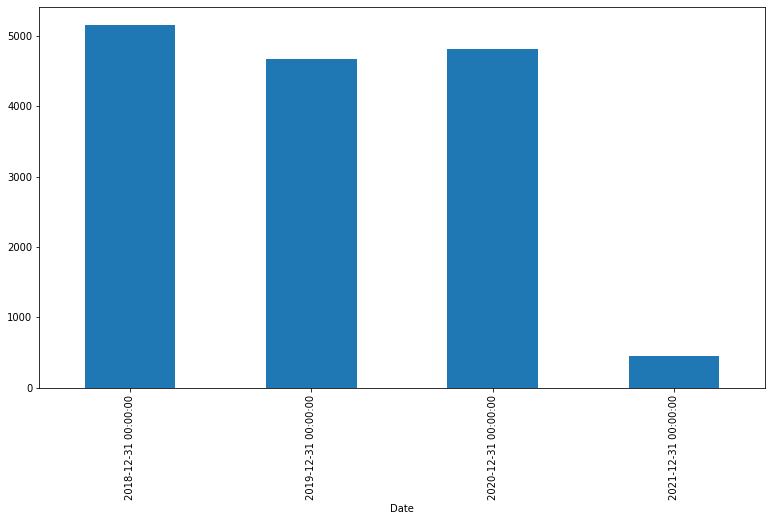

In [33]:
df['sign'].resample(rule = 'A').sum().plot.bar(figsize = (13,7))

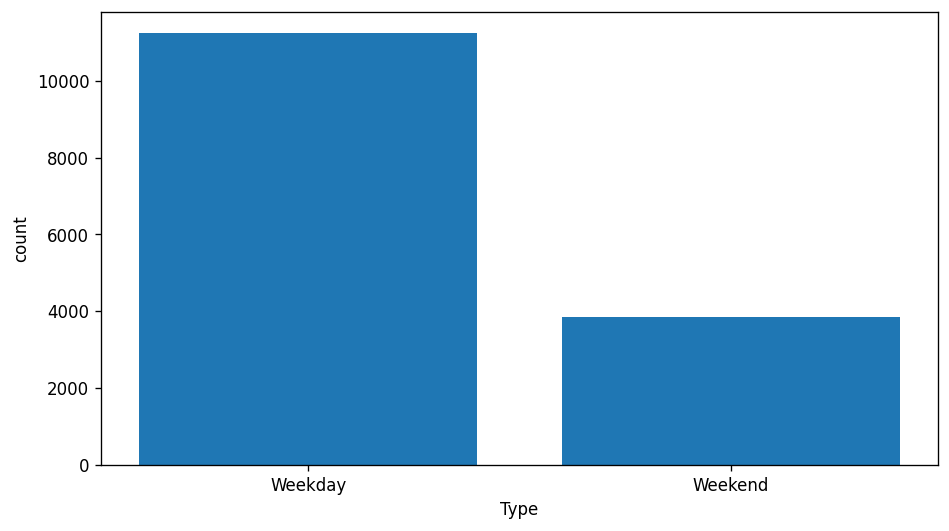

In [43]:
import matplotlib.pyplot as plt

df['year'] = [d.year for d in df.index]

df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()
df['hour'] = [d.strftime('%H') for d in df.index]
df['WEEKDAY'] = pd.to_datetime(df.index).dayofweek
df['weekend'] = 0          # Initialize the column with default value of 0
df.loc[df['WEEKDAY'].isin([5, 6]), 'weekend'] = 1  # 5 and 6 correspond to Sat and Sun
weekday_cnt = df['sign'].where(df['weekend'] == 0 ).sum()
weekedn_cnt = df['sign'].where(df['weekend'] == 1 ).sum()
cnt_dayType = {'Weekday':weekday_cnt , 'Weekend':weekedn_cnt}
weektypeName = list(cnt_dayType.keys())
weektypeValues = list(cnt_dayType.values())
fig = plt.figure(figsize = (9, 5), dpi = 120) 
  
# creating the bar plot 
plt.bar(weektypeName, weektypeValues) 
  
plt.xlabel("Type") 
plt.ylabel("count") 
plt.show() 

In [56]:
weekdays = [0,1,2,3,4,5,6]
weekdays_cnts = {}
for i in weekdays:
    weekdays_cnts[i] = df['sign'].where(df['WEEKDAY'] == i ).sum()/len(df['sign'].where(df['WEEKDAY'] == i).dropna())
weekdays_cnts

{0: 0.5650212314225053,
 1: 0.6212606837606838,
 2: 0.6014957264957265,
 3: 0.6178343949044586,
 4: 0.5851910828025477,
 5: 0.5459129511677282,
 6: 0.4774416135881104}

In [53]:
df['sign'].where(df['WEEKDAY'] == 0 ).sum()/len(df['sign'].where(df['WEEKDAY'] == 0).dropna())

0.5650212314225053

In [47]:
df['sign'].where(df['WEEKDAY'] == 0 ).sum()

2129.0

In [54]:
len(df['sign'].where(df['WEEKDAY'] == 0).dropna())

3768

Text(0, 0.5, 'mean')

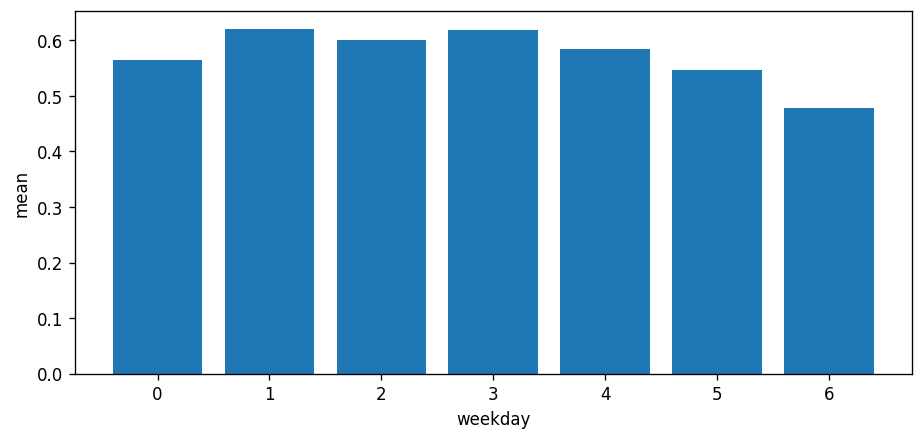

In [57]:
dayNumber = list(weekdays_cnts.keys())
cnts_weekday = list(weekdays_cnts.values())
fig = plt.figure(figsize = (9,4),dpi = 120)
plt.bar(dayNumber , cnts_weekday)
plt.xlabel("weekday")
plt.ylabel('mean')

In [38]:
hours = df.hour.unique()
hours

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [58]:
hours_cnts = {}
for i in hours:
    hours_cnts[i] = df['sign'].where(df['hour'] == i).sum()/len(df['sign'].where(df['hour'] == i).dropna())


Text(0, 0.5, 'counts_up')

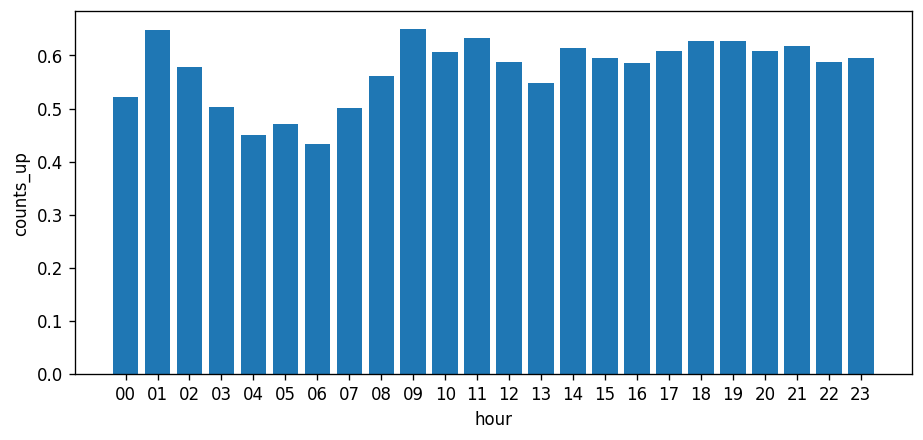

In [59]:
hourNumber = list(hours_cnts.keys())
cnts_hours = list(hours_cnts.values())
fig = plt.figure(figsize = (9,4) , dpi = 120)
plt.bar(hourNumber , cnts_hours)
plt.xlabel("hour")
plt.ylabel('counts_up')